In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import os

# Script

In [2]:
E_levels = [0, 1, 2, 3, 4, 5]
x_samples = 256
xlims = [np.array([-10, 10])*(E+1)**0.5 for E in E_levels]
ofdir = './time_evolution/'
t_samples = 10000
Ts = [i for i in range(1, 11)] + [100]

In [17]:
for t in tqdm(Ts):
    for i, E in enumerate(E_levels):
        os.system(f"./exercise05 -m {x_samples} -x {xlims[i][0]},{xlims[i][1]} -n {t_samples} -t {t} -e {E} -o {ofdir}{t_samples}T{t}_E")

100%|██████████| 11/11 [00:40<00:00,  3.64s/it]


# Load data

In [18]:
E = 2
T = 5
data_list = []
with open(ofdir + f"{t_samples}T{T}_E{E+1}.dat", 'rb') as file:
    for t in range(t_samples):
        data = np.fromfile(file, dtype='float64', count=x_samples)
        data_list.append(data)
data=np.stack(data_list)

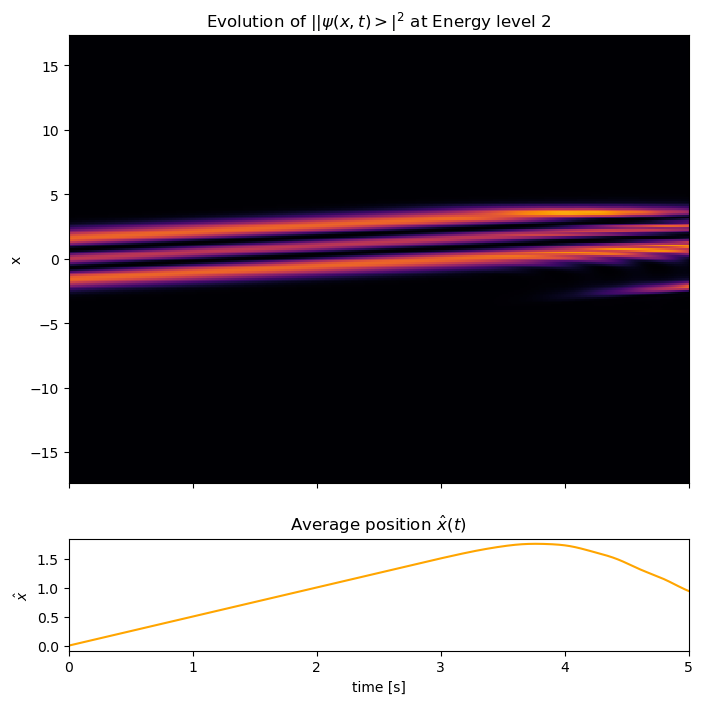

In [19]:
y = np.linspace(xlims[E][0], xlims[E][1], x_samples, endpoint=True)
x = np.linspace(0, T, t_samples, endpoint=True)

fig, (ax_psi2, ax_pos) = plt.subplots(2, 1, figsize=(8,8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

ax_psi2.pcolormesh(x, y, data.T**2, cmap='inferno')
ax_psi2.set_title(r'Evolution of $||\psi(x, t)>|^2$ at Energy level ' + str(E))
ax_psi2.set_ylabel('x')

ax_pos.plot(x, np.sum(data.T**2*y.reshape([-1, 1]), axis=0), c='orange')
ax_pos.set_title(r'Average position $\hat x(t)$')
ax_pos.set_ylabel(r'$\hat x$')
ax_pos.set_xlabel('time [s]')
fig.savefig(f'p_evol_T{T}_E{E}', dpi=600)

# tried with fixed potential

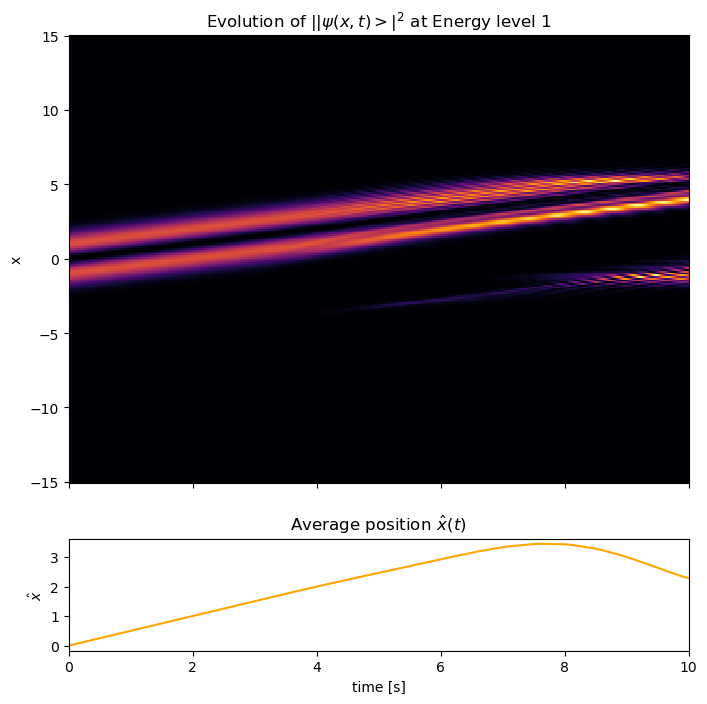

In [57]:
data_list = []
with open(ofdir + f"fixed_T10_E2.dat", 'rb') as file:
    for t in range(t_samples):
        data = np.fromfile(file, dtype='float64', count=x_samples)
        data_list.append(data)
data=np.stack(data_list)

y = np.linspace(-15, 15, 256, endpoint=True)
x = np.linspace(0, 10, 10000, endpoint=True)

fig, (ax_psi2, ax_pos) = plt.subplots(2, 1, figsize=(8,8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

ax_psi2.pcolormesh(x, y, data.T**2, cmap='inferno')
ax_psi2.set_title(r'Evolution of $||\psi(x, t)>|^2$ at Energy level ' + str(1))
ax_psi2.set_ylabel('x')

ax_pos.plot(x, np.sum(data.T**2*y.reshape([-1, 1]), axis=0), c='orange')
ax_pos.set_title(r'Average position $\hat x(t)$')
ax_pos.set_ylabel(r'$\hat x$')
ax_pos.set_xlabel('time [s]')
fig.savefig(f'fixed_p_evol_T{10}_E{1}', dpi=600)

# Try with different w

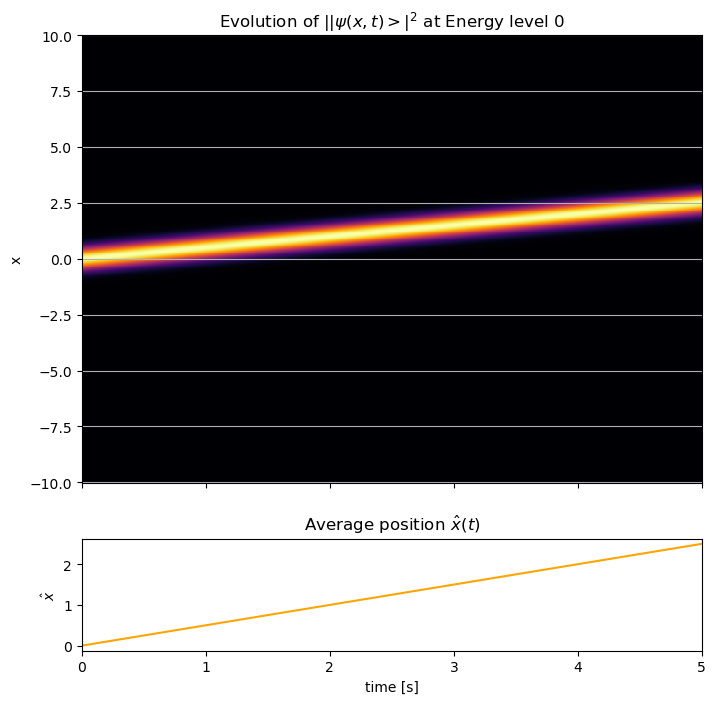

In [3]:
data_list = []
w = 4
E = 0
T = 5
x_samples = 512
t_samples = 10000
with open(ofdir + f"w{w}_T{T}_E{E+1}.dat", 'rb') as file:
    for t in range(t_samples):
        data = np.fromfile(file, dtype='float64', count=x_samples)
        data_list.append(data)
data=np.stack(data_list)

y = np.linspace(-10, 10, x_samples, endpoint=True)
x = np.linspace(0, T, t_samples, endpoint=True)

fig, (ax_psi2, ax_pos) = plt.subplots(2, 1, figsize=(8,8), sharex=True, gridspec_kw={'height_ratios': [4, 1]})

ax_psi2.pcolormesh(x, y, data.T**2, cmap='inferno')
ax_psi2.set_title(r'Evolution of $||\psi(x, t)>|^2$ at Energy level ' + str(E))
ax_psi2.set_ylabel('x')
ax_psi2.grid(axis='y')

ax_pos.plot(x, np.sum(data.T**2*y.reshape([-1, 1]), axis=0), c='orange')
ax_pos.set_title(r'Average position $\hat x(t)$')
ax_pos.set_ylabel(r'$\hat x$')
ax_pos.set_xlabel('time [s]')
fig.savefig(f'p_evol_w{w}_T{T}_E{E}', dpi=600)

# Check slopes for different T and E

In [5]:
slopes = np.empty((len(Ts), len(E_levels)))
errors = np.empty((len(Ts), len(E_levels)))
for i, T in enumerate(Ts):
    x = np.linspace(0, T, t_samples, endpoint=True)
    for j, E in enumerate(E_levels):
        y = np.linspace(xlims[E][0], xlims[E][1], x_samples, endpoint=True)
        data_list = []
        with open(ofdir + f"{t_samples}T{T}_E{E+1}.dat", 'rb') as file:
            for t in range(t_samples):
                data = np.fromfile(file, dtype='float64', count=x_samples)
                data_list.append(data)
        data=np.stack(data_list)
        (m, b), cov = np.polyfit(x, np.sum(data.T**2*y.reshape([-1, 1]), axis=0), deg=1, cov='unscaled')
        slopes[i, j] = m
        errors[i, j] = np.sqrt(cov[0,0])


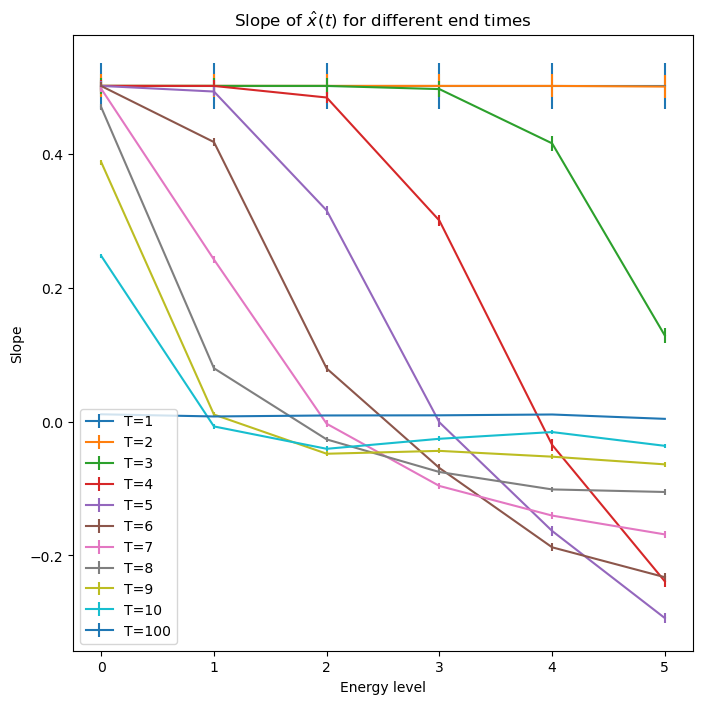

In [6]:
fig, ax = plt.subplots(figsize=(8,8))
for i, T in enumerate(Ts):
    ax.errorbar(E_levels, slopes[i, :], yerr=errors[i, :], label=f'T={T}')

ax.legend()
ax.set_title(r'Slope of $\hat x(t)$ for different end times')
ax.set_xlabel('Energy level')
ax.set_ylabel('Slope')
fig.savefig('slope_T.svg')

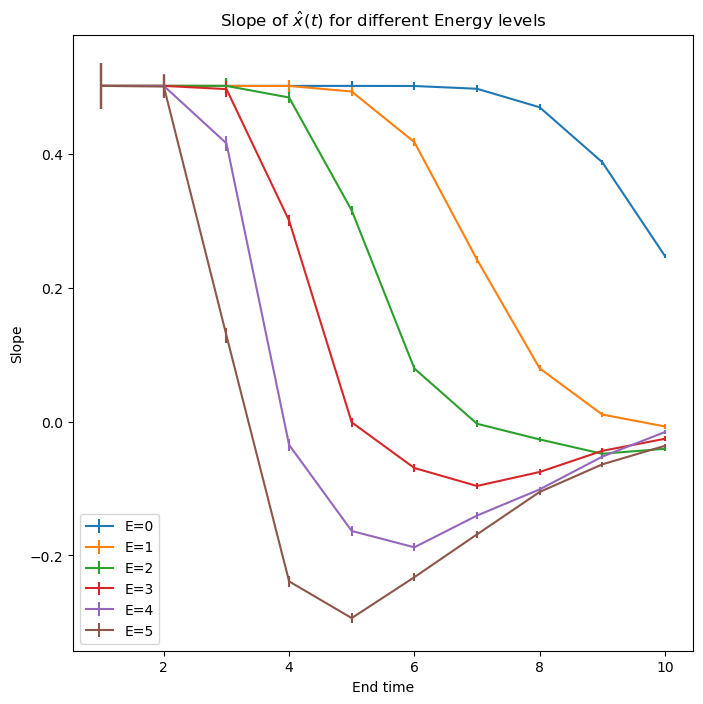

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
for j, E in enumerate(E_levels):
    ax.errorbar(Ts[:-1], slopes[:, j][:-1], yerr=errors[:, j][:-1], label=f'E={E}')

ax.legend()
ax.set_title(r'Slope of $\hat x(t)$ for different Energy levels')
ax.set_xlabel('End time')
ax.set_ylabel('Slope')
fig.savefig('slope_E.svg')